### Homography Matrix Example

Source: https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from skimage import transform
from skimage.io import imread, imshow

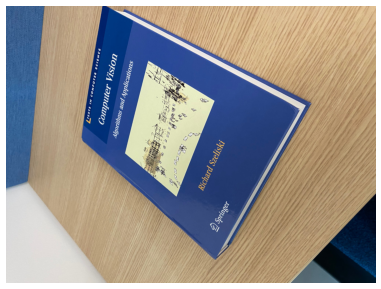

In [14]:
# Read in the image path
book_img = imread('images/book.jpg')

# Display the image
plt.figure(figsize=(8, 6), dpi=60)
plt.imshow(book_img)
plt.axis('off')
plt.show()


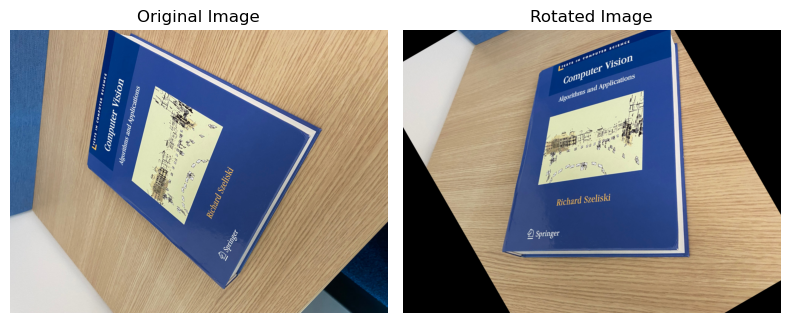

In [23]:
# The book is already rotated, so let's try to make it look upright
book_rotate = transform.rotate(book_img, -60)

# Plot the original and rotated images
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].imshow(book_img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(book_rotate)
axes[1].set_title('Rotated Image')
axes[1].axis('off')

# Better spacing
fig.tight_layout()

plt.show()

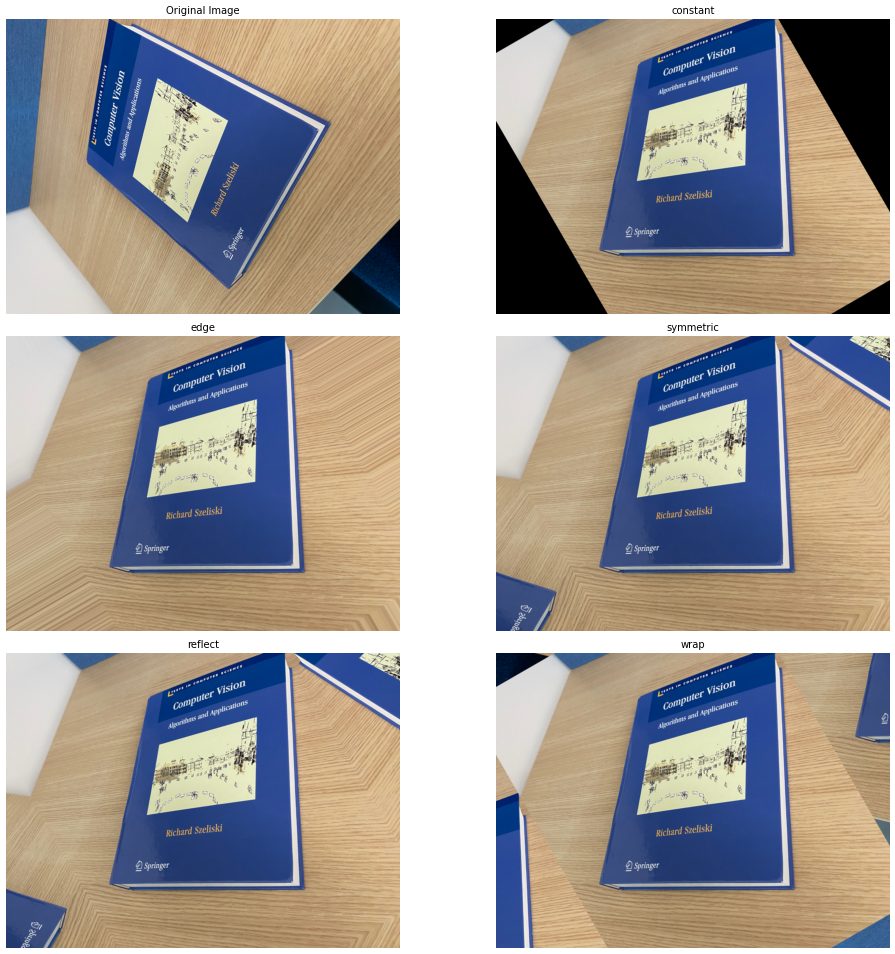

In [27]:
# Now, let us try to fill in the blank spaces
def rotate_fills(image):
    modes = ['constant', 'edge', 'symmetric', 'reflect', 'wrap']
    fig, ax = plt.subplots(3, 2, figsize=(18, 16), dpi=60)

    for i, axis in enumerate(ax.flatten()):
        if i == 0:
            axis.set_title("Original Image")
            axis.imshow(image)
            axis.axis('off')

        else:
            axis.set_title(f'{modes[i - 1]}')

            transformed_image = transform.rotate(image, -60, mode = modes[i - 1])
            axis.imshow(transformed_image)
            axis.axis('off')
    
    fig.tight_layout()


rotate_fills(book_img)

##### The Rotation Transformation does not seem like the best option from all the modes available. Let's try warping!

##### Warping does take a lot more thinking and computation than simply rotation. We need to find the points of interest in the original image and our desired position of the object. 

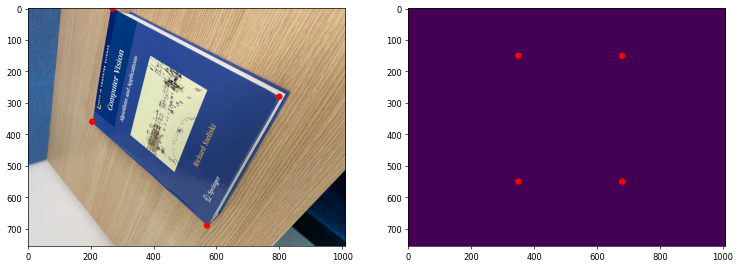

In [58]:
points_of_interest = np.array([[270, 0],
                               [205, 360],
                               [570, 690],
                               [800, 280]])

points_of_projection = np.array([[350, 150],
                                 [680, 150],
                                 [350, 550],
                                 [680, 550]])

color = 'red'
fig, ax = plt.subplots(1, 2, figsize=(15, 20), dpi=60)

# Obtain our points at the corners of our object of interest
for i in range(len(points_of_interest)):
    point_original = Circle((points_of_interest[i][0], points_of_interest[i][1]), 10, facecolor=color)
    point_projection = Circle((points_of_projection[i][0], points_of_projection[i][1]), 10, facecolor=color)

    ax[0].add_patch(point_original)
    ax[1].add_patch(point_projection)

ax[0].imshow(book_img)

# Create a blank image
blank_img = np.ones((book_img.shape[0], book_img.shape[1]))
ax[1].imshow(blank_img)

##### Apply the projective transformation to see if we get the image we desire.

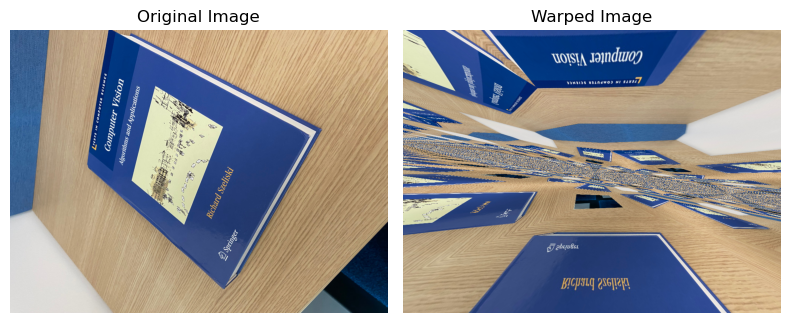

In [65]:
projective_transform = transform.estimate_transform('projective', points_of_interest, points_of_projection)

# modes = ['constant', 'edge', 'symmetric', 'reflect', 'wrap']
img_warp = transform.warp(book_img, projective_transform.inverse, mode = 'symmetric')

# Plot the original and warped images
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].imshow(book_img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_warp)
axes[1].set_title('Warped Image')
axes[1].axis('off')

# Better spacing
fig.tight_layout()

plt.show()